In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import json,ast
import plotly
import plotly.offline as py
import datetime

In [2]:
df = pd.read_csv('the-movies-dataset/movies_metadata.csv')
df.head().transpose()


/home/vinove/Documents/Jupyter/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [3]:
print(df.shape)
df.columns


(45466, 24)


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

The above dataset has 24 Coulmns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

There are a total of 45,466 movies with 24 features. Most of the features have very few NaN values (apart from homepage and tagline). We will attempt at cleaning this dataset to a form suitable for analysis in the next section.

# Data Wrangling

In [5]:
df = df.drop(['imdb_id'], axis=1)
df = df.drop(['original_title'],axis=1)

In [6]:
df.shape

(45466, 22)

In [7]:
df['revenue'] = df['revenue'].replace(0,np.nan)

In [8]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

In [9]:
df['return'] = df['revenue']/df['budget']



In [10]:
df['year'] = pd.to_datetime(df['release_date'],errors='coerce').apply(lambda x: str(x).split('-')[0] if x!=np.nan else np.nan)

In [11]:
#df['year']

In [12]:
df['adult'].value_counts()


False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

there are close to 0 adult movies in the dataset so the 'adult' column is not relevant. 

In [13]:
df = df.drop('adult',axis=1)

In [14]:
df['video'].value_counts()


False    45367
True        93
Name: video, dtype: int64

In [15]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

# EDA

In [16]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [17]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

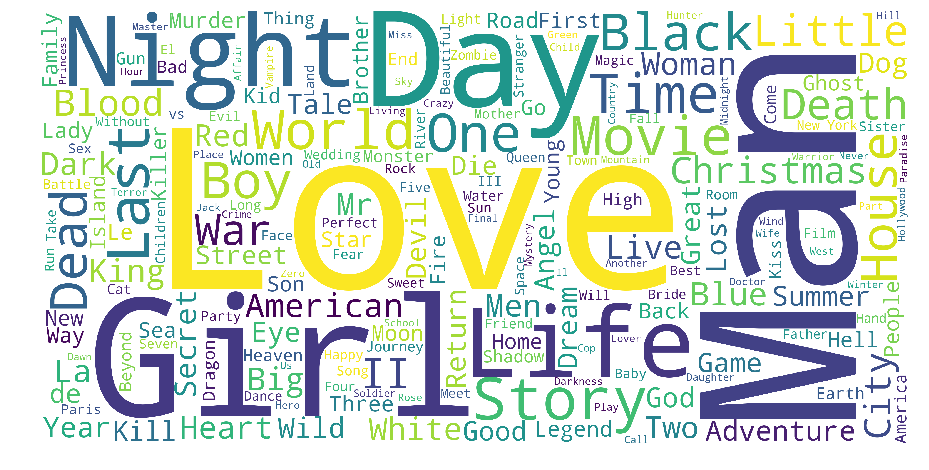

In [18]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

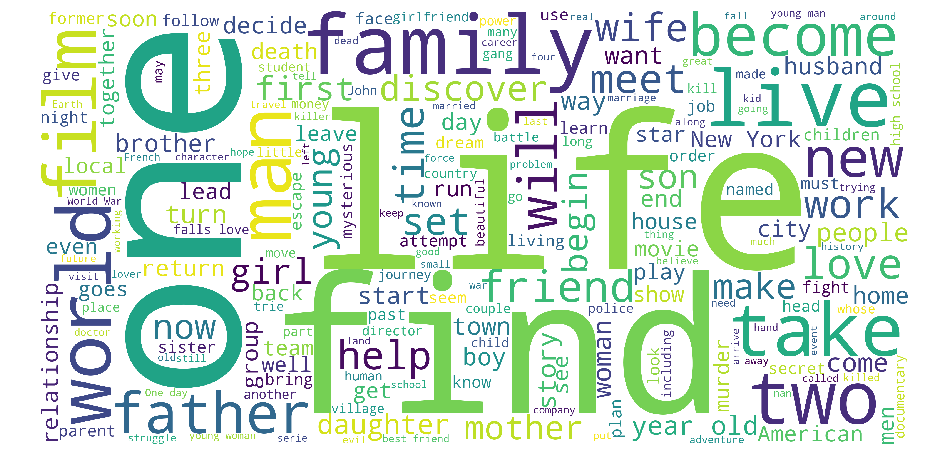

In [19]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [20]:
df['production_countries'].isnull().sum()

3

In [21]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [22]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'


In [23]:
con_df = df.join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index()
con_df = con_df.drop('index',axis=1)

con_df.sort_values('num_movies',ascending=False).head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [24]:
con_df = con_df[con_df['country'] != 'United States of America']

In [25]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )
plt.show()

# Franchise Movies

In [26]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x,dict) else np.nan)



/home/vinove/Documents/Jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [27]:
df_fran['belongs_to_collection'] = df_fran[df_fran['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'].isnull().sum()
#df_fran['belongs_to_collection']

/home/vinove/Documents/Jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



3

In [28]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue',aggfunc={'revenue': ['mean','sum','count']})
fran_pivot.sort_values('count', ascending=False)

,count,mean,sum
belongs_to_collection,,,
James Bond Collection,26,2.733450e+08,7.106970e+09
Friday the 13th Collection,12,3.874155e+07,4.648985e+08
Pokémon Collection,11,6.348189e+07,6.983008e+08
Harry Potter Collection,8,9.634209e+08,7.707367e+09
Halloween Collection,8,3.089601e+07,2.471681e+08
A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
Star Wars Collection,8,9.293118e+08,7.434495e+09


The Bowery Boys has the largest collection with the count 29, it also consist of Jamesbond Collection with the count 26

In [29]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,count,mean,sum
belongs_to_collection,,,
Avatar Collection,1,2.787965e+09,2.787965e+09
The Avengers Collection,2,1.462481e+09,2.924962e+09
Frozen Collection,1,1.274219e+09,1.274219e+09
Finding Nemo Collection,2,9.844532e+08,1.968906e+09
The Hobbit Collection,3,9.785078e+08,2.935523e+09
The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
Harry Potter Collection,8,9.634209e+08,7.707367e+09
Star Wars Collection,8,9.293118e+08,7.434495e+09
Despicable Me Collection,4,9.227676e+08,3.691070e+09


With just 1 count, Avatar is the highest grossing movie

In [30]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,count,mean,sum
belongs_to_collection,,,
Harry Potter Collection,8,9.634209e+08,7.707367e+09
Star Wars Collection,8,9.293118e+08,7.434495e+09
James Bond Collection,26,2.733450e+08,7.106970e+09
The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
Transformers Collection,5,8.732202e+08,4.366101e+09
Despicable Me Collection,4,9.227676e+08,3.691070e+09
The Twilight Collection,5,6.684215e+08,3.342107e+09
Ice Age Collection,5,6.433417e+08,3.216709e+09


The Harry Potter Franchise is the most successful movie franchise raking in more than 7.707 billion dollars from 8 movies. The Star Wars Movies come in a close second with a 7.403 billion dollars from 8 movies too. James Bond is third but the franchise has significantly more movies compared to the others in the list and therefore, a much smaller average gross.

In [31]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)

df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [32]:
df['production_companies']

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
5        [Regency Enterprises, Forward Pass, Warner Bros.]
6        [Paramount Pictures, Scott Rudin Productions, ...
7                                   [Walt Disney Pictures]
8        [Universal Pictures, Imperial Entertainment, S...
9                        [United Artists, Eon Productions]
10          [Columbia Pictures, Castle Rock Entertainment]
11       [Columbia Pictures, Castle Rock Entertainment,...
12       [Universal Pictures, Amblin Entertainment, Amb...
13       [Hollywood Pictures, Cinergi Pictures Entertai...
14       [Le Studio Canal+, Laurence Mark Productions, ...
15       [Universal Pictures, Légende Entreprises, Syal...
16       [Columbia Pictures Corporation, Mirage Enterpr.

In [33]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'
s

0                       Pixar Animation Studios
1                              TriStar Pictures
1                                  Teitler Film
1                     Interscope Communications
2                                  Warner Bros.
2                                Lancaster Gate
3        Twentieth Century Fox Film Corporation
4                         Sandollar Productions
4                           Touchstone Pictures
5                           Regency Enterprises
5                                  Forward Pass
5                                  Warner Bros.
6                            Paramount Pictures
6                       Scott Rudin Productions
6                            Mirage Enterprises
6                         Sandollar Productions
6                   Constellation Entertainment
6                                     Worldwide
6                 Mont Blanc Entertainment GmbH
7                          Walt Disney Pictures
8                            Universal P

In [34]:
com_df = df.drop('production_companies', axis=1).join(s)

In [35]:
com_df.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_countries,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,companies
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,Pixar Animation Studios
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,<img src='http://image.tmdb.org/t/p/w185//vzmL...,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,TriStar Pictures
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,<img src='http://image.tmdb.org/t/p/w185//vzmL...,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Teitler Film
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,<img src='http://image.tmdb.org/t/p/w185//vzmL...,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Interscope Communications
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,<img src='http://image.tmdb.org/t/p/w185//6ksm...,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,Warner Bros.


In [36]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

/home/vinove/Documents/Jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [37]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


In [38]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)


,Total,Average,Number
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40


In [39]:
com_pivot.sort_values('Number', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Columbia Pictures,3.227974e+10,1.367785e+08,236
Metro-Goldwyn-Mayer (MGM),1.237679e+10,5.979126e+07,207
New Line Cinema,2.217339e+10,1.119868e+08,198
Touchstone Pictures,1.412178e+10,8.937839e+07,158
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures Corporation,1.134909e+10,8.106493e+07,140


#### Eda for the original lannguages


In [40]:
df['original_language'].drop_duplicates().count()

92

In [41]:
lang = pd.DataFrame(df['original_language'].value_counts())
lang['lang'] = lang.index
lang.columns = ['num', 'language']
lang.head(10)

,num,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de
es,994,es
ru,826,ru
hi,508,hi
ko,444,ko
zh,409,zh


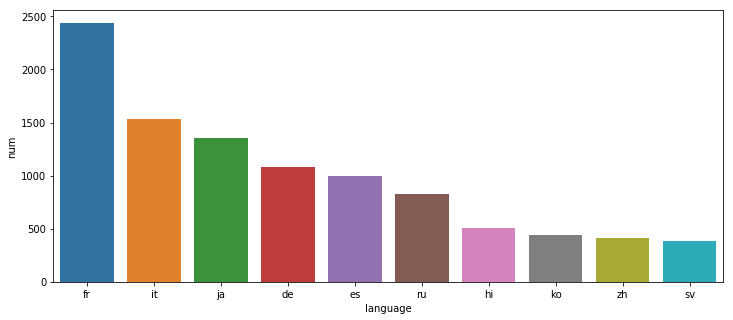

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(x='language',y='num',data = lang.iloc[1:11])
plt.show()

from the above we can see that most movies are on english language, also hindi is at 8th position

In [43]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [44]:
df['spoken_languages']

0                             [English]
1                   [English, Français]
2                             [English]
3                             [English]
4                             [English]
5                    [English, Español]
6                   [Français, English]
7                    [English, Deutsch]
8                             [English]
9           [English, Pусский, Español]
10                            [English]
11                   [English, Deutsch]
12                            [English]
13                            [English]
14                     [English, Latin]
15                            [English]
16                            [English]
17                            [English]
18                            [English]
19                            [English]
20                            [English]
21                   [English, Deutsch]
22       [English, Español, Nederlands]
23                            [English]
24                            [English]


In [46]:
df['vote_average'] = df['vote_average'].replace(0,np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

/home/vinove/Documents/Jupyter/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



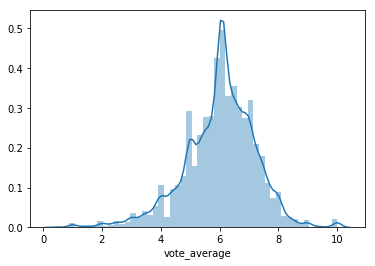

In [47]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

In [57]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [58]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

/home/vinove/Documents/Jupyter/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



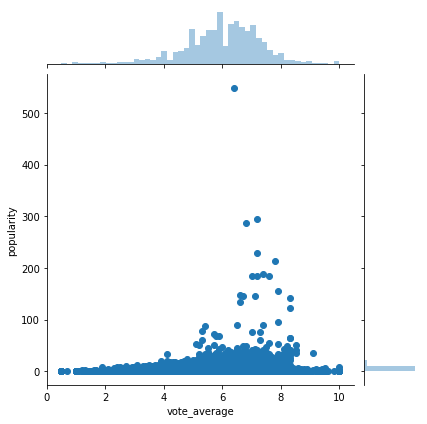

In [60]:
sns.jointplot(x='vote_average', y='popularity', data=df)
plt.show()
#df['popularity'] = df['popularity'].astype('int')
#sns.distplot(df['popularity'].fillna(df['popularity'].median()))

/home/vinove/Documents/Jupyter/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



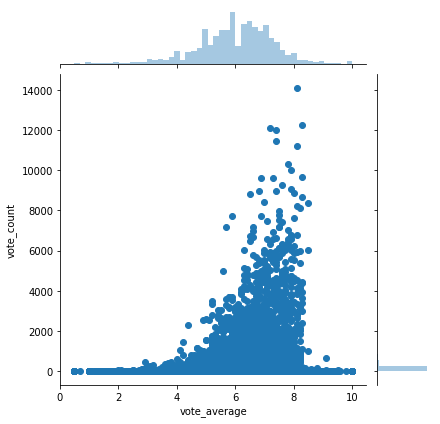

In [61]:
sns.jointplot(x='vote_average', y='vote_count', data=df)
plt.show()

# Movie Release Date



In [77]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [102]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [99]:
def get_month(x):
    try:
        return month[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [103]:

df['day'] = df['release_date'].apply(get_day)
df['month'] = pd.to_datetime(df['release_date'],errors='coerce').apply(get_month)



0        Mon
1        Fri
2        Fri
3        Fri
4        Fri
5        Fri
6        Fri
7        Fri
8        Fri
9        Thu
10       Fri
11       Fri
12       Fri
13       Fri
14       Fri
15       Wed
16       Wed
17       Sat
18       Fri
19       Tue
20       Fri
21       Fri
22       Fri
23       Fri
24       Fri
25       Fri
26       Fri
27       Wed
28       Tue
29       Sun
        ... 
45436    Fri
45437    Thu
45438    Thu
45439    Thu
45440    Mon
45441    Thu
45442    Sun
45443    Tue
45444    Sun
45445    Mon
45446    Fri
45447    Sat
45448    Fri
45449    Tue
45450    Mon
45451    Mon
45452    Thu
45453    Fri
45454    Sun
45455    Sat
45456    Fri
45457    Sun
45458    Tue
45459    Sun
45460    Mon
45461    NaN
45462    Thu
45463    Fri
45464    Sun
45465    Fri
Name: day, Length: 45466, dtype: object

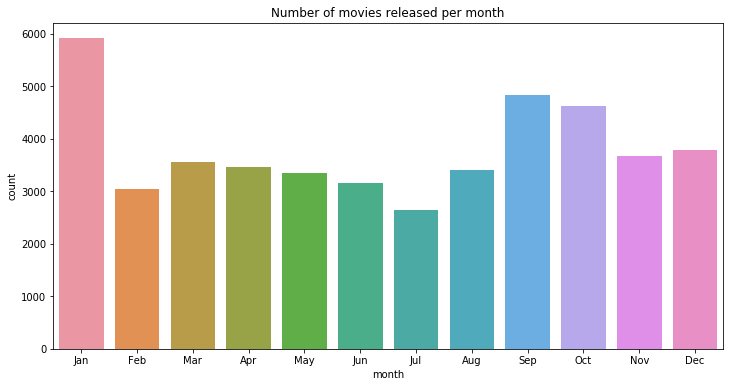

In [105]:
plt.figure(figsize=(12,6))
plt.title('Number of movies released per month')
sns.countplot(x='month', data=df, order=month)
plt.show()

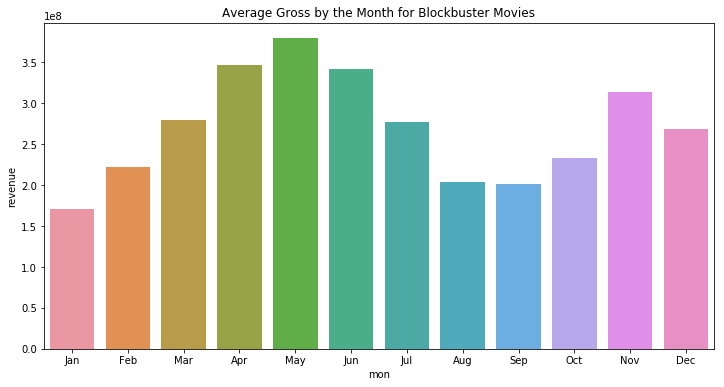

In [108]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month)
plt.show()

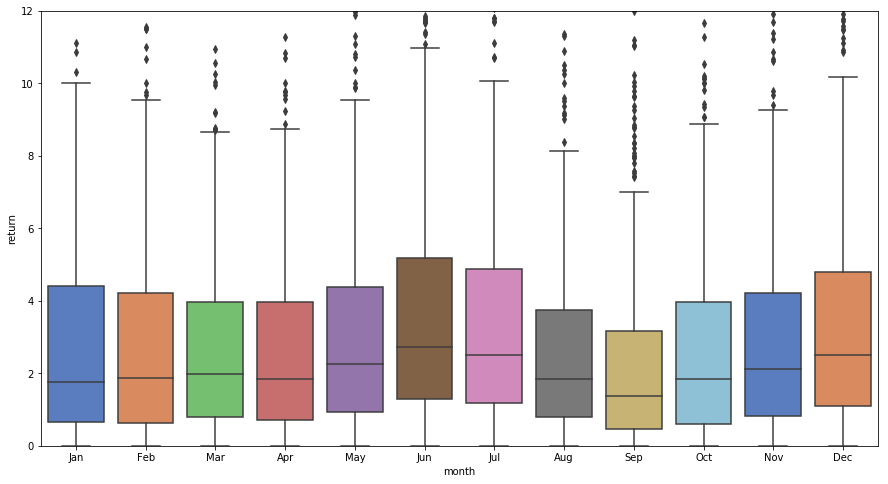

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=df[df['return'].notnull()], palette="muted", ax =ax, order=month)
ax.set_ylim([0, 12])
plt.show()

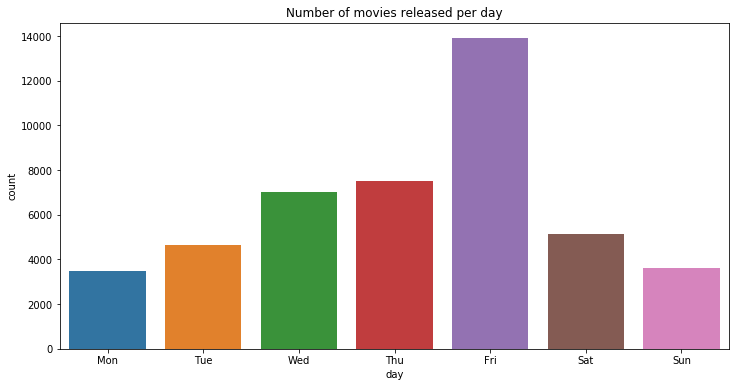

In [106]:
plt.figure(figsize=(12,6))
plt.title('Number of movies released per day')
sns.countplot(x='day',data=df,order=day_order)
plt.show()

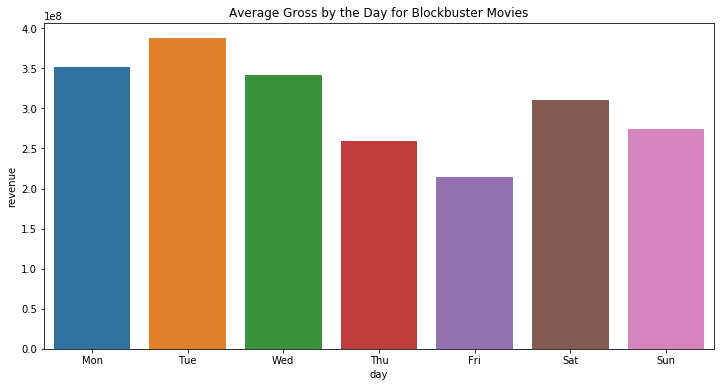

In [110]:
day_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('day')['revenue'].mean())
day_mean['day'] = day_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Day for Blockbuster Movies")
sns.barplot(x='day', y='revenue', data=day_mean, order=day_order)
plt.show()

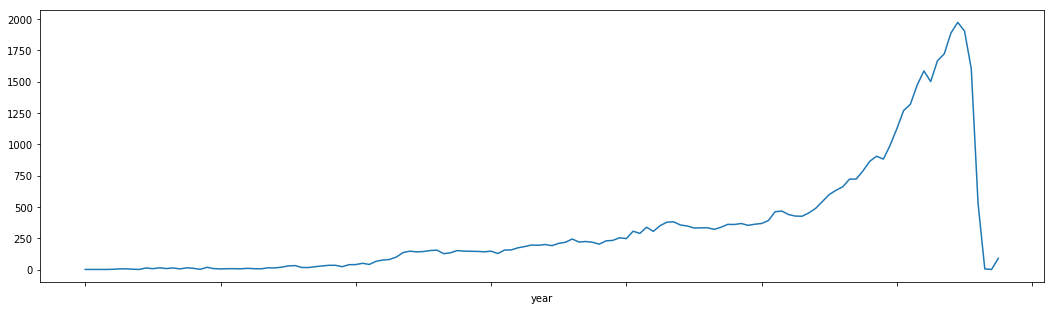

In [114]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

In [116]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_21 = df.copy()
df_21['year'] = df_21[df_21['year'] != 'NaT']['year'].astype(int)
df_21 = df_21[df_21['year'] >=2000]
hmap_21 = pd.pivot_table(data=df_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)

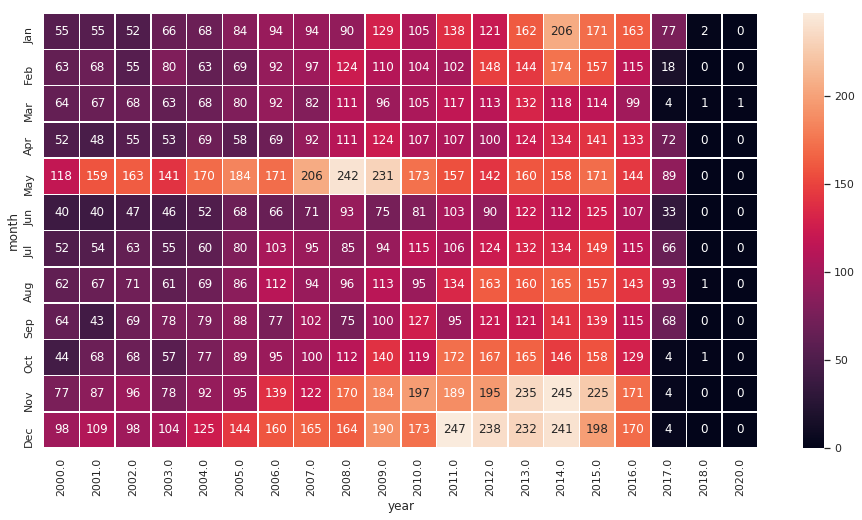

In [118]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month)
plt.show()